# Client Insights: Customer Segmentation & Business Value Analysis

## Executive Summary

This notebook provides a comprehensive customer segmentation analysis designed to drive actionable business decisions and maximize marketing ROI.

**Key Objectives:**
1. Identify 4-6 meaningful customer segments using advanced clustering techniques
2. Predict campaign response rates to optimize marketing spend


In [ ]:
!pip install mlflow optuna eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.1 MB/s eta 0:00:00


---
## Table of Contents

1. [Data Loading & Preprocessing](#1-data-loading--preprocessing)
2. [Phase 1: Customer Segmentation](#phase-1-customer-segmentation)
   - Feature Engineering
   - Clustering Analysis
   - Segment Profiling & Naming
3. [Phase 2: Advanced Analytics](#phase-2-advanced-analytics)
   - Campaign Response Prediction
   - Customer Lifetime Value Analysis
   - Next Best Action Engine
   - Churn Risk & Retention Strategy
4. [Phase 3: Business Impact Dashboard](#phase-3-business-impact-dashboard)
   - ROI Calculations
   - Decision Dashboard
   - Strategic Recommendations

---

## 1. Data Loading & Preprocessing

We begin by loading the customer personality data and performing initial data quality checks.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [ ]:
# Load data
import kagglehub
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
df = pd.read_csv(path + '/marketing_campaign.csv', delimiter='\t')

print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
df.head()

Using Colab cache for faster access to the 'customer-personality-analysis' dataset.
Dataset shape: (2240, 29)
Missing values: 24


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Get the summary statistics of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Quality & Cleaning

Remove outliers and handle missing values to ensure robust analysis.

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Year_Birth'}>]], dtype=object)

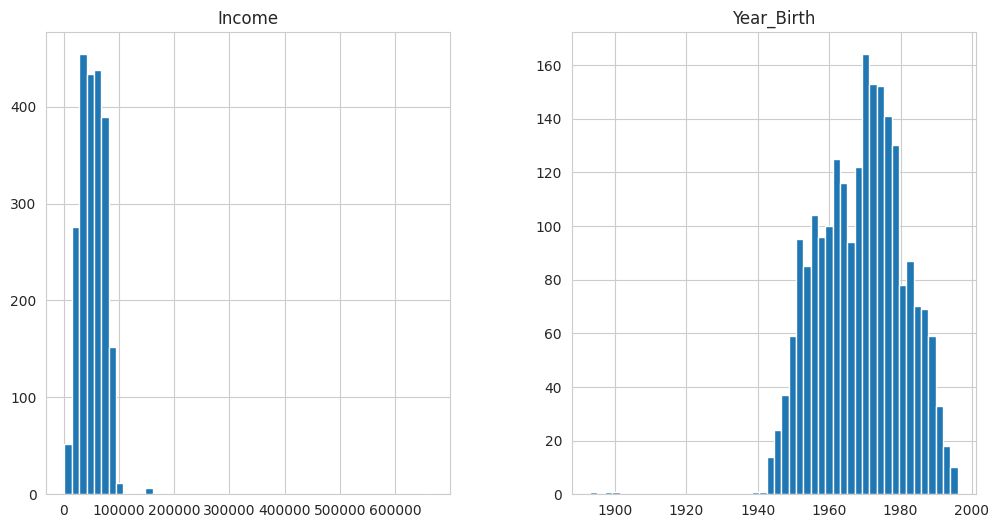

In [ ]:
df[['Income','Year_Birth']].hist(bins=50)

In [ ]:
# Remove outliers
print(f"Original dataset size: {len(df)}")

# Remove unrealistic birth years and income outliers
df = df[(df['Year_Birth'] > 1935) & (df['Income'] < 200000)]
df = df.dropna()

print(f"After cleaning: {len(df)} rows ({(1 - len(df)/2240)*100:.1f}% removed)")
print(f"\n✓ Data cleaning complete")

Original dataset size: 2240
After cleaning: 2212 rows (1.2% removed)

✓ Data cleaning complete


---
## Phase 1: Customer Segmentation

### Feature Engineering

We create meaningful features that capture customer behavior, value, and engagement patterns.

In [ ]:
# Calculate Age and Customer Tenure
df['Age'] = 2021 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Tenure_Days'] = (pd.to_datetime('2021-01-01') - df['Dt_Customer']).dt.days

# Family size
df['Has_Children'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)
df['Living_Alone'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'] else 0)
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Living_Alone'].apply(lambda x:1 if x==1 else 2)

# Education level (simplified)
education_mapping = {'Basic': 1, '2n Cycle': 1, 'Graduation': 2, 'Master': 2, 'PhD': 3}
df['Education_Level'] = df['Education'].map(education_mapping)

In [ ]:
# Total Spending
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Spending per category ratio
for category in ['MntWines', 'MntMeatProducts', 'MntFish Products', 'MntFruits', 'MntSweetProducts', 'MntGoldProds']:
    if category in df.columns:
        df[f'{category}_Ratio'] = df[category] / (df['Total_Spending'] + 1) # We add 1 to avoid zero division errors


In [ ]:
# Campaign responsiveness score
df['Campaign_Response_Score'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'])

# Total purchases and channel preferences
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df['Web_Purchase_Ratio'] = df['NumWebPurchases'] / (df['Total_Purchases'] + 1)
df['Catalog_Purchase_Ratio'] = df['NumCatalogPurchases'] / (df['Total_Purchases'] + 1)
df['Store_Purchase_Ratio'] = df['NumStorePurchases'] / (df['Total_Purchases'] + 1)

# Average order value
df['Avg_Order_Value'] = df['Total_Spending'] / (df['Total_Purchases'] + 1)

df = df.dropna()

### Clustering Analysis

We use K-means clustering to identify distinct customer segments. The optimal number of clusters is determined using the Elbow method and Silhouette analysis.

In [ ]:
# For clustering, we typically want to exclude categorical variables (unless properly encoded), IDs, data leak features,
# and highly correlated/redundant variables. Here, we'll use all available numeric features except obvious identifiers or target-like columns.

exclude_cols = [
    'ID',
    'Response',             # Target
    'Z_CostContact',        # Constant
    'Z_Revenue',            # Constant
    'Dt_Customer',          # Date - already engineered tenure/recency
    'Education',            # Categorical raw
    'Marital_Status',       # Categorical raw

]

# Select all numeric columns except excluded
clustering_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude_cols
]

# Prepare data for clustering
X_cluster = df[clustering_features].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"✓ Prepared {X_scaled.shape[0]} customers with {X_scaled.shape[1]} features for clustering")

✓ Prepared 2212 customers with 40 features for clustering


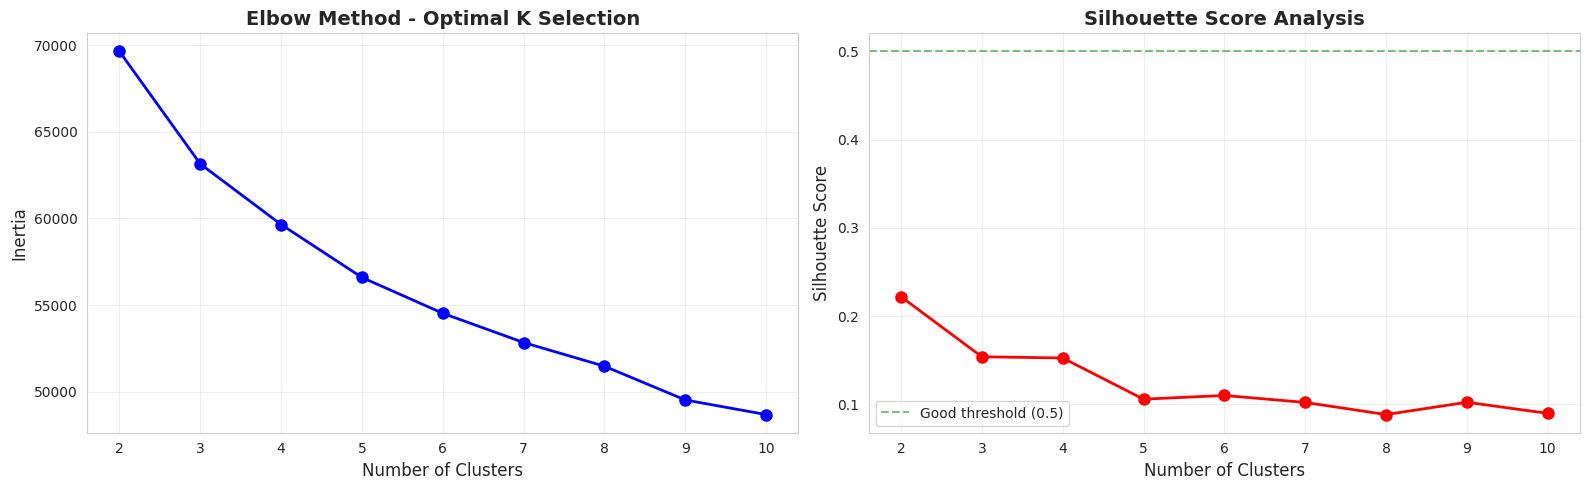


Silhouette Scores:
  K=2: 0.2221
  K=3: 0.1541
  K=4: 0.1527
  K=5: 0.1060
  K=6: 0.1102
  K=7: 0.1023
  K=8: 0.0886
  K=9: 0.1025
  K=10: 0.0900

✓ Recommended number of clusters: 4


In [ ]:
# Determine optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method - Optimal K Selection', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Analysis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.5, color='g', linestyle='--', alpha=0.5, label='Good threshold (0.5)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"  K={k}: {score:.4f}")

# Recommend optimal K
optimal_k = silhouette_scores.index(max(silhouette_scores[2:6])) + 2  # Between 4-8 clusters
print(f"\n✓ Recommended number of clusters: {optimal_k}")

In [ ]:
# Fit final clustering model
optimal_k = 4

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=50, max_iter=500)
df['Segment'] = kmeans_final.fit_predict(X_scaled)

print(f"Silhouette Score: {silhouette_score(X_scaled, df['Segment']):.4f}")
print(df['Segment'].value_counts().sort_index())


Silhouette Score: 0.1527
Segment
0    439
1    162
2    644
3    967
Name: count, dtype: int64


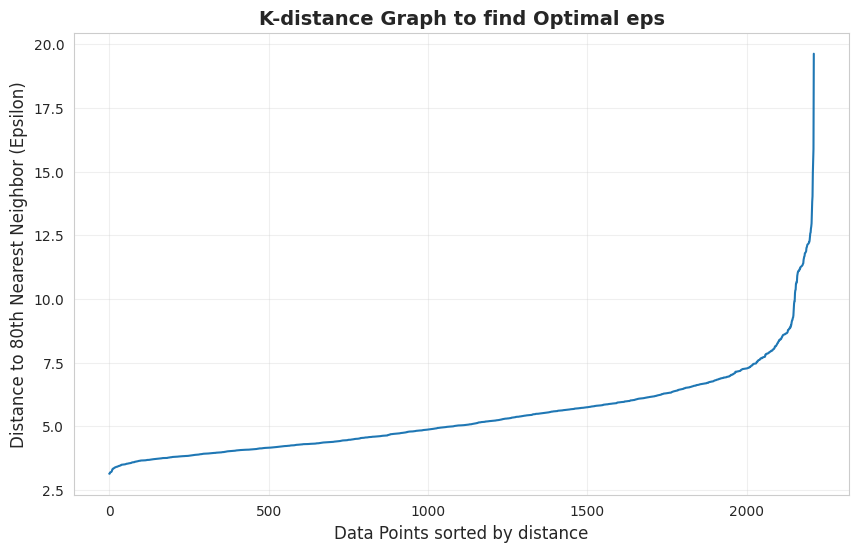

✓ Look for the 'knee' (sharp bend) in the graph. The Y-axis value at that point is your optimal 'eps'.


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 1. reuse your existing X_scaled from the previous code
# Ensure X_scaled is defined (as per your previous snippet)

# 2. define min_samples
# Rule of thumb: 2 * n_features, or simply 5 or 10 for customer data
min_samples = 2 * X_scaled.shape[1]

# 3. Calculate k-nearest neighbors
# We look at the distance to the (min_samples)-th nearest neighbor
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 4. Sort and plot distances to find the "Elbow"
distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph to find Optimal eps', fontsize=14, fontweight='bold')
plt.xlabel('Data Points sorted by distance', fontsize=12)
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor (Epsilon)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"✓ Look for the 'knee' (sharp bend) in the graph. The Y-axis value at that point is your optimal 'eps'.")

✓ DBSCAN found 1 clusters and 1161 noise points.
! Warning: Only 1 cluster found. Try decreasing 'eps' or 'min_samples'.


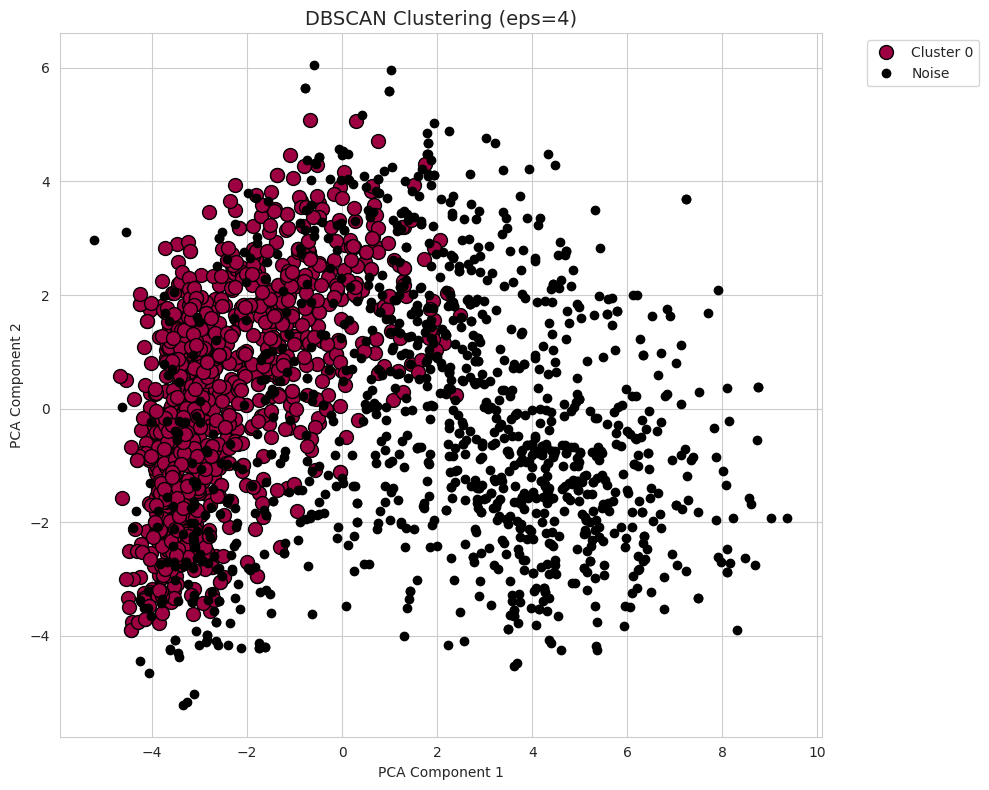

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

# --- PARAMETERS TO TUNE ---
CHOSEN_EPS = 4    # <--- REPLACE THIS based on the plot above (Y-axis value at the bend)
MIN_SAMPLES = 2 * X_scaled.shape[1]
# --------------------------

# 1. Fit DBSCAN
dbscan = DBSCAN(eps=CHOSEN_EPS, min_samples=MIN_SAMPLES)
labels = dbscan.fit_predict(X_scaled)

# 2. Analyze Results
# DBSCAN labels noise as -1. We usually want to count how much noise we have.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"✓ DBSCAN found {n_clusters_} clusters and {n_noise_} noise points.")

# 3. Evaluate (Only if we have more than 1 cluster)
if n_clusters_ > 1:
    sil_score = silhouette_score(X_scaled, labels)
    print(f"✓ Silhouette Score: {sil_score:.4f}")
else:
    print("! Warning: Only 1 cluster found. Try decreasing 'eps' or 'min_samples'.")

# 4. Visualize with PCA (2D Projection)
# Since we have many features, we project to 2D to see the separation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        label_name = "Noise"
    else:
        label_name = f"Cluster {k}"

    class_member_mask = (labels == k)

    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k == -1 else 10, label=label_name)

plt.title(f'DBSCAN Clustering (eps={CHOSEN_EPS})', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Segment Profiling & Business-Friendly Naming

We analyze each segment's characteristics and assign meaningful business names.

In [ ]:
# Create comprehensive segment profiles
segment_profiles = df.groupby('Segment').agg({
    'Income': ['median', 'mean'],
    'Age': ['median', 'mean'],
    'Total_Spending': ['median', 'mean', 'sum'],
    'Campaign_Response_Score': ['mean', 'sum'],
    'Total_Purchases': ['median', 'mean'],
    'Family_Size': 'mean',
    'Has_Children': 'mean',
    'Avg_Order_Value': 'mean',
    'NumWebVisitsMonth': 'mean',
    'Web_Purchase_Ratio': 'mean',
    'Catalog_Purchase_Ratio': 'mean',
    'Store_Purchase_Ratio': 'mean'
}).round(2)

segment_profiles['Customer_Count'] = df.groupby('Segment').size()
segment_profiles['Pct_of_Total'] = (df.groupby('Segment').size() / len(df) * 100).round(1)

print(segment_profiles)

          Income              Age        Total_Spending                   \
          median      mean median   mean         median     mean     sum   
Segment                                                                    
0        72968.0  72725.19   52.0  53.00         1198.0  1246.89  547385   
1        82573.5  81882.70   49.0  51.02         1676.5  1636.94  265184   
2        57310.5  57019.58   56.0  56.96          611.5   685.03  441160   
3        33762.0  34147.80   48.0  48.60           61.0    92.60   89548   

        Campaign_Response_Score      Total_Purchases        Family_Size  \
                           mean  sum          median   mean        mean   
Segment                                                                   
0                          0.20   88            19.0  19.15        1.80   
1                          2.13  345            20.0  19.88        1.89   
2                          0.24  152            16.0  16.56        2.90   
3                

In [ ]:
# Assign business-friendly names based on segment characteristics
# Only 4 segments included in the mapping
segment_names = {
    0: 'High-Value Customers',
    1: 'Budget-Conscious Families',
    2: 'Mature Loyalists',
    3: 'Price-Sensitive Shoppers'
}

df['Segment_Name'] = df['Segment'].map(segment_names)

for seg, name in segment_names.items():
    count = len(df[df['Segment'] == seg])
    pct = count / len(df) * 100
    print(f"Segment {seg}: {name} ({count} customers, {pct:.1f}%)")

Segment 0: High-Value Customers (439 customers, 19.8%)
Segment 1: Budget-Conscious Families (162 customers, 7.3%)
Segment 2: Mature Loyalists (644 customers, 29.1%)
Segment 3: Price-Sensitive Shoppers (967 customers, 43.7%)


### Segment Visualization

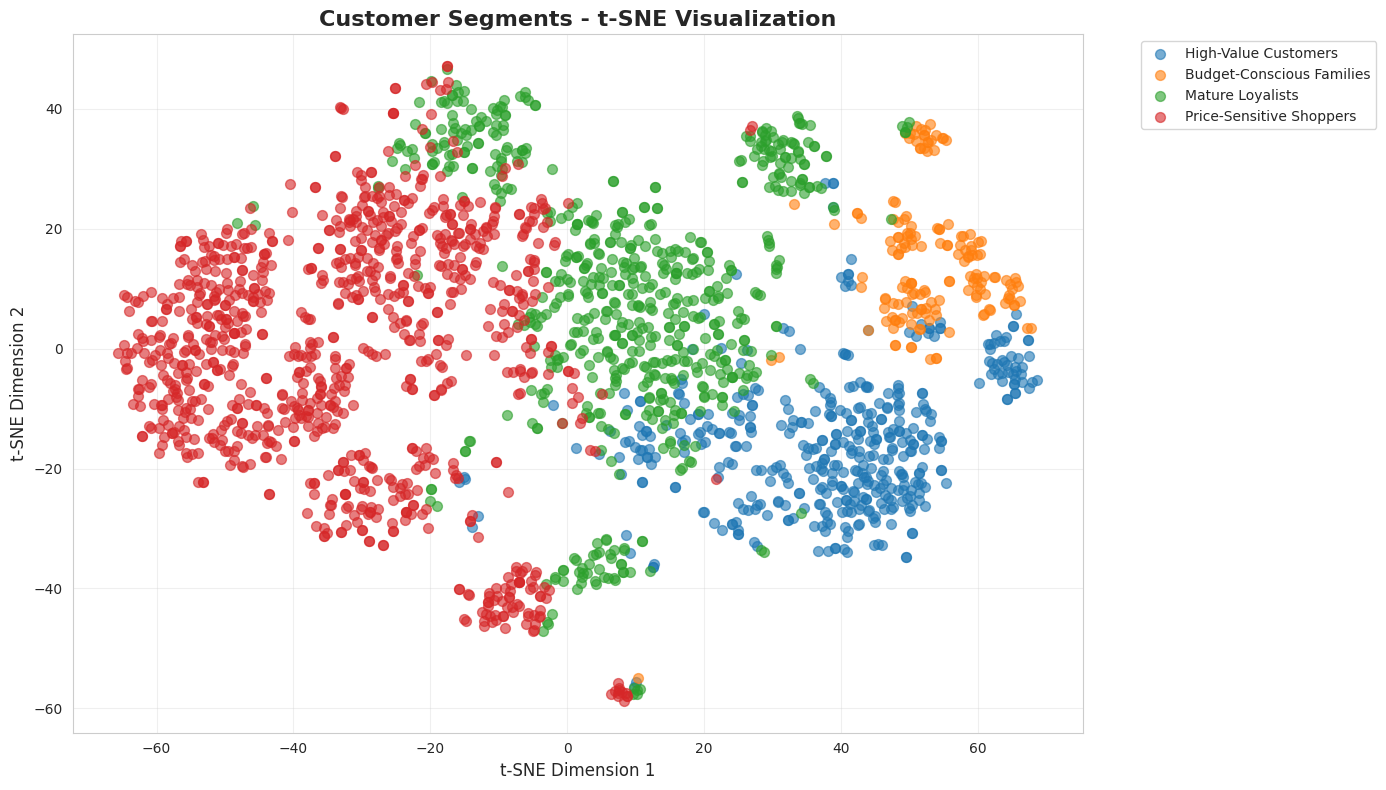

In [ ]:
# t-SNE visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(14, 8))
for seg in sorted(df['Segment'].unique()):
    mask = df['Segment'] == seg
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                label=segment_names[seg], alpha=0.6, s=50)

plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('Customer Segments - t-SNE Visualization', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

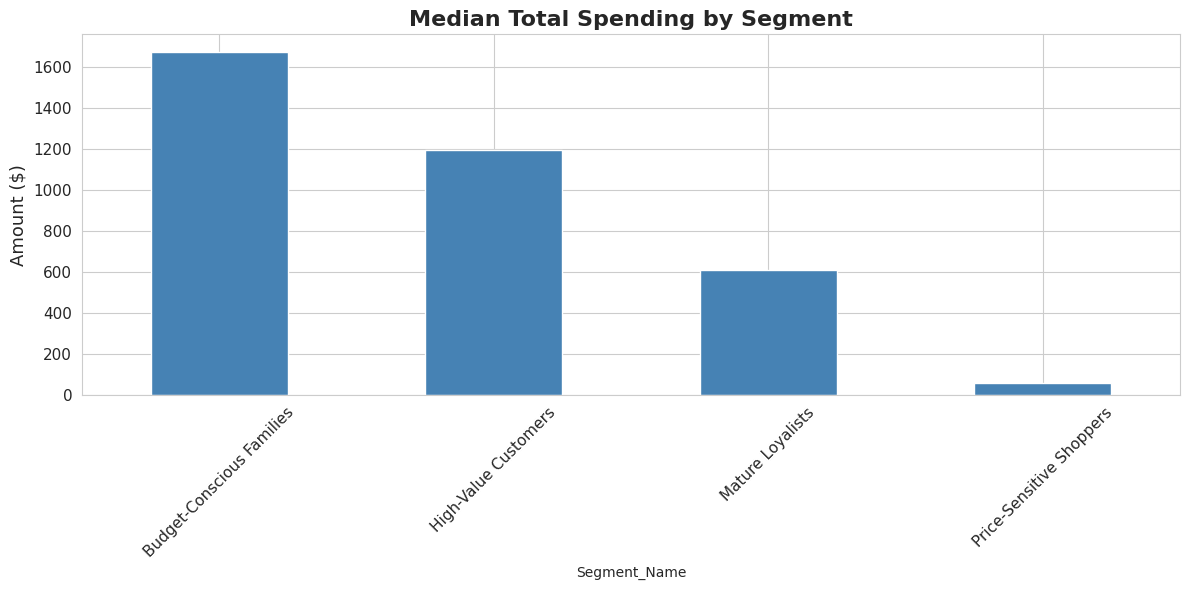

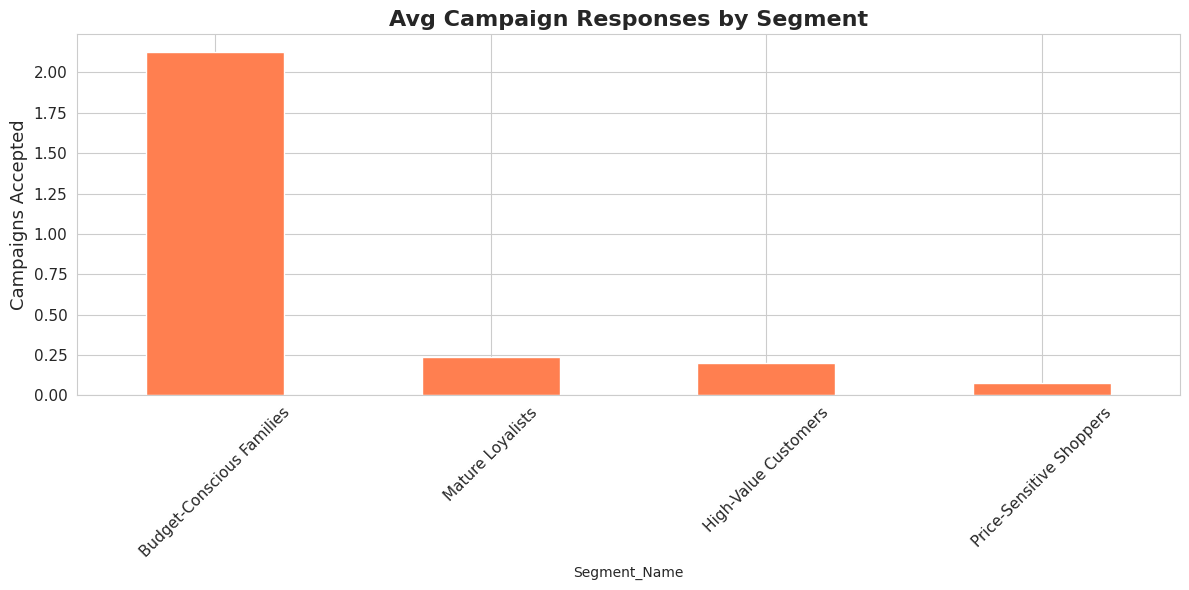

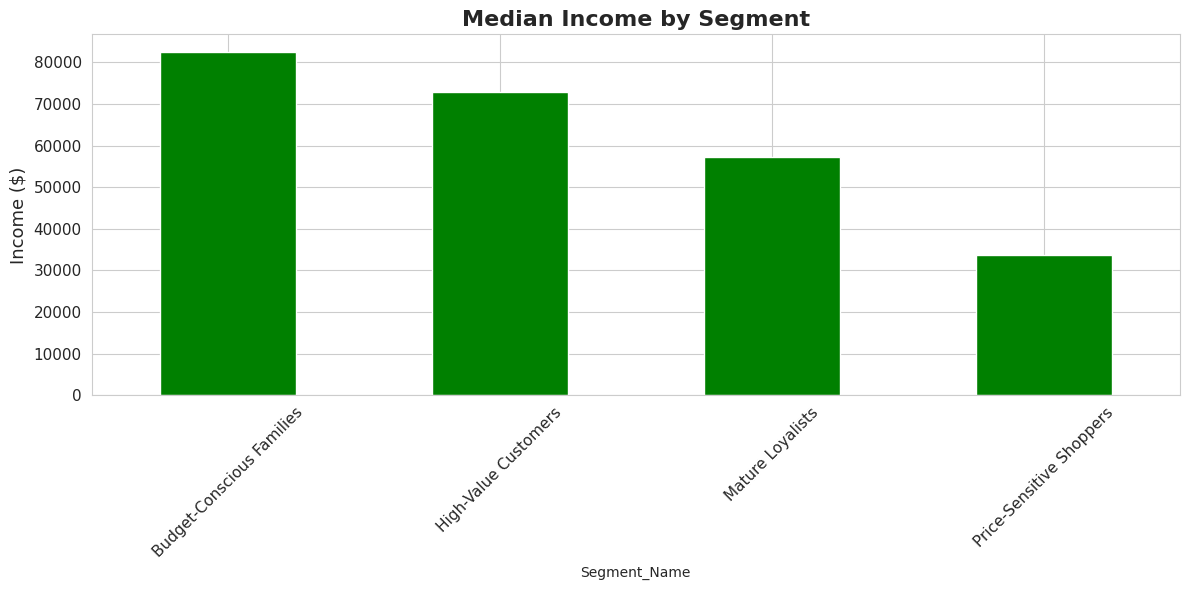

In [ ]:
# Median Total Spending by Segment
plt.figure(figsize=(12, 6))
segment_spending = df.groupby('Segment_Name')['Total_Spending'].median().sort_values(ascending=False)
segment_spending.plot(kind='bar', color='steelblue')
plt.title('Median Total Spending by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Amount ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Avg Campaign Responses by Segment
plt.figure(figsize=(12, 6))
segment_campaign = df.groupby('Segment_Name')['Campaign_Response_Score'].mean().sort_values(ascending=False)
segment_campaign.plot(kind='bar', color='coral')
plt.title('Avg Campaign Responses by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Campaigns Accepted', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Median Income by Segment
plt.figure(figsize=(12, 6))
segment_income = df.groupby('Segment_Name')['Income'].median().sort_values(ascending=False)
segment_income.plot(kind='bar', color='green')
plt.title('Median Income by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Income ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

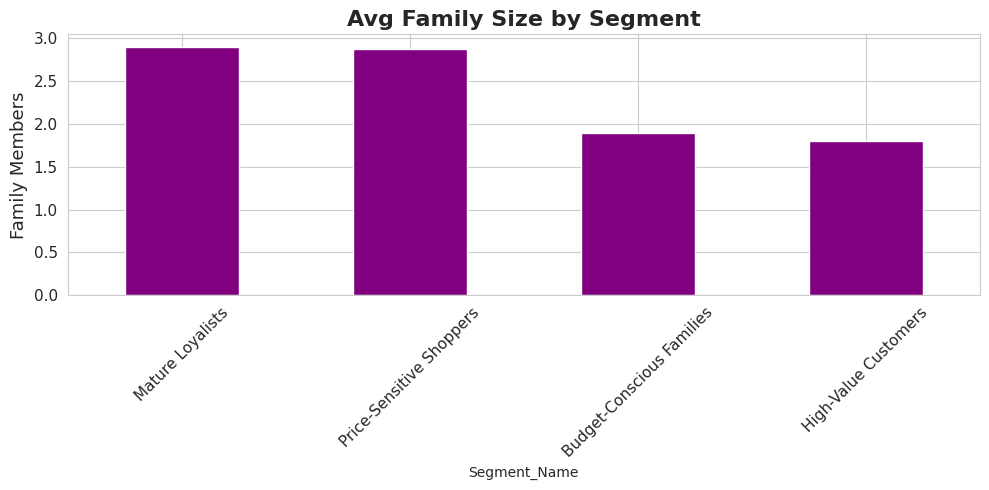

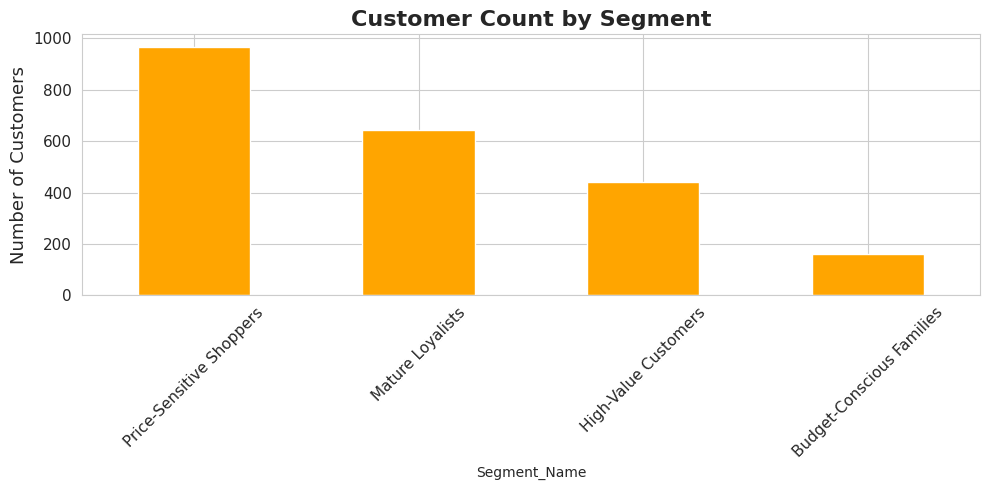

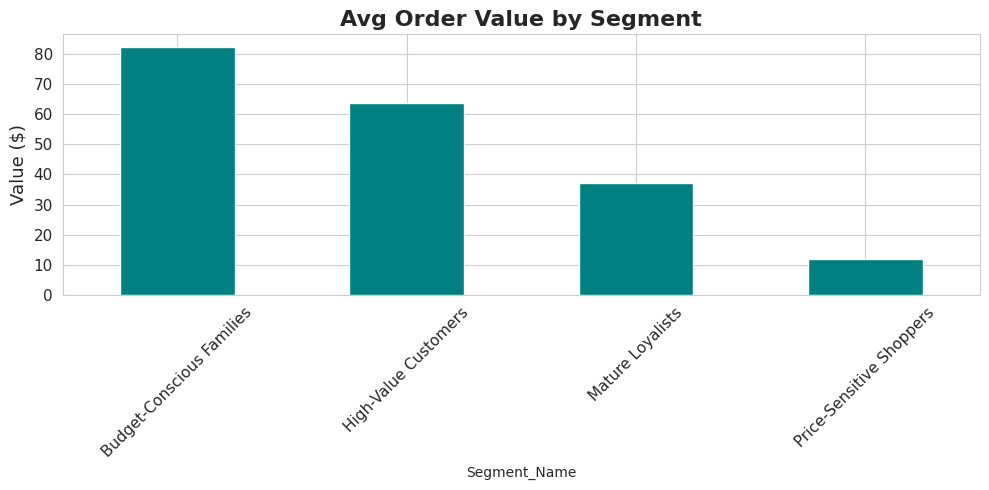

In [ ]:
# Plot each as a separate figure rather than subplots

# Family Size
plt.figure(figsize=(10, 5))
segment_family = df.groupby('Segment_Name')['Family_Size'].mean().sort_values(ascending=False)
segment_family.plot(kind='bar', color='purple')
plt.title('Avg Family Size by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Family Members', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Customer Count
plt.figure(figsize=(10, 5))
segment_count = df['Segment_Name'].value_counts().sort_values(ascending=False)
segment_count.plot(kind='bar', color='orange')
plt.title('Customer Count by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Number of Customers', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Average Order Value
plt.figure(figsize=(10, 5))
segment_aov = df.groupby('Segment_Name')['Avg_Order_Value'].mean().sort_values(ascending=False)
segment_aov.plot(kind='bar', color='teal')
plt.title('Avg Order Value by Segment', fontweight='bold', fontsize=16)
plt.ylabel('Value ($)', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


---
## Phase 2: Advanced Analytics

### 2.1 Campaign Response Prediction Model

Build a predictive model to identify which customers are most likely to respond to future campaigns.

In [ ]:
# Prepare data for campaign response prediction
# Target: Whether the customer responded to the last marketing campaign
# One-hot encode 'Education' and 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df = df.drop('Dt_Customer', axis=1)

# Select features: all numeric columns except 'Response'
numeric_cols = df.select_dtypes(include='number').columns
X = df[[col for col in numeric_cols if col != 'Response']]
y = df['Response']

# Train-test split (now X and y have the same number of rows)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features for models sensitive to scale (Logistic Regression, SGDClassifier, SVM)
# Tree-based models are generally not sensitive to scaling, but it won't harm them.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame, preserving column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Response rate in training: {y_train.mean():.1%}")
print(f"Response rate in test: {y_test.mean():.1%}")

Training set: 1548 samples
Test set: 664 samples
Response rate in training: 15.1%
Response rate in test: 15.1%


We tuned our threshold for prediction to 0.35. This was done in order to improve the Recall,Precision and F1 score. Since our dataset was not imbalanced, we felt thresholding was our best option to do so

In [ ]:
def train_models_with_tuning(
    X_train,
    X_test,
    y_train,
    y_test,
    models_to_train=None,
    n_trials=10,
    threshold=0.35,
    experiment_name="Model_Selection",
    random_state=42
):
    """
    Train and tune multiple classification models using Optuna for hyperparameter optimization
    and MLflow for experiment tracking.
    """

    # Define all available models
    available_models = {
        'Logistic Regression': {},
        'Random Forest': {},
        'Gradient Boosting': {},
        'Ridge Classifier': {},
        'Naive Bayes': {},
        'Support Vector Machine': {}
    }

    # Filter models if specified
    if models_to_train is not None:
        models = {k: v for k, v in available_models.items() if k in models_to_train}
        if not models:
            raise ValueError(f"No valid models selected. Available: {list(available_models.keys())}")
    else:
        models = available_models

    def objective(trial, clf_name):
        """Optuna objective function for hyperparameter optimization."""
        with mlflow.start_run(nested=True, run_name=f"{clf_name}_trial"):
            if clf_name == 'Logistic Regression':
                C = trial.suggest_loguniform('C', 1e-3, 10)
                solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
                model = LogisticRegression(random_state=random_state, max_iter=1000, C=C, solver=solver)
                mlflow.log_param('C', C)
                mlflow.log_param('solver', solver)

            elif clf_name == 'Random Forest':
                n_estimators = trial.suggest_int('n_estimators', 50, 200)
                max_depth = trial.suggest_int('max_depth', 3, 20)
                min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
                model = RandomForestClassifier(
                    random_state=random_state,
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split
                )
                mlflow.log_param('n_estimators', n_estimators)
                mlflow.log_param('max_depth', max_depth)
                mlflow.log_param('min_samples_split', min_samples_split)

            elif clf_name == 'Gradient Boosting':
                n_estimators = trial.suggest_int('n_estimators', 50, 200)
                max_depth = trial.suggest_int('max_depth', 2, 10)
                learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
                model = GradientBoostingClassifier(
                    random_state=random_state,
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=learning_rate
                )
                mlflow.log_param('n_estimators', n_estimators)
                mlflow.log_param('max_depth', max_depth)
                mlflow.log_param('learning_rate', learning_rate)

            elif clf_name == 'Ridge Classifier':
                alpha = trial.suggest_loguniform('alpha', 1e-4, 10)
                model = SGDClassifier(
                    loss='log_loss',
                    penalty='l2',
                    alpha=alpha,
                    random_state=random_state,
                    max_iter=1000,
                    tol=1e-3,
                    fit_intercept=True,
                    class_weight='balanced',
                    n_jobs=-1
                )
                mlflow.log_param('alpha', alpha)

            elif clf_name == 'Naive Bayes':
                var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
                model = GaussianNB(var_smoothing=var_smoothing)
                mlflow.log_param('var_smoothing', var_smoothing)

            elif clf_name == 'Support Vector Machine':
                C = trial.suggest_loguniform('C', 1e-3, 10)
                kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
                gamma = trial.suggest_loguniform('gamma', 1e-4, 1) if kernel == 'rbf' else 'scale'
                model = SVC(probability=True, random_state=random_state, C=C, kernel=kernel, gamma=gamma)
                mlflow.log_param('C', C)
                mlflow.log_param('kernel', kernel)
                mlflow.log_param('gamma', gamma)
            else:
                raise ValueError(f"Unknown classifier: {clf_name}")

            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            mlflow.log_metric('roc_auc', roc_auc)
            return roc_auc

    results = {}
    best_models = {}

    # Main MLflow run
    with mlflow.start_run(run_name=experiment_name):
        mlflow.log_param('n_trials', n_trials)
        mlflow.log_param('threshold', threshold)
        mlflow.log_param('random_state', random_state)

        for clf_name in models.keys():
            with mlflow.start_run(run_name=clf_name, nested=True):
                # Optuna optimization
                study = optuna.create_study(direction='maximize')
                study.optimize(
                    lambda trial: objective(trial, clf_name),
                    n_trials=n_trials,
                    show_progress_bar=False
                )

                best_params = study.best_params

                # Train final model with best parameters
                if clf_name == 'Logistic Regression':
                    model = LogisticRegression(random_state=random_state, max_iter=1000, **best_params)
                elif clf_name == 'Random Forest':
                    model = RandomForestClassifier(random_state=random_state, **best_params)
                elif clf_name == 'Gradient Boosting':
                    model = GradientBoostingClassifier(random_state=random_state, **best_params)
                elif clf_name == 'Ridge Classifier':
                    model = SGDClassifier(
                        loss='log_loss',
                        penalty='l2',
                        random_state=random_state,
                        max_iter=1000,
                        tol=1e-3,
                        fit_intercept=True,
                        class_weight='balanced',
                        n_jobs=-1,
                        **best_params
                    )
                elif clf_name == 'Naive Bayes':
                    model = GaussianNB(**best_params)
                elif clf_name == 'Support Vector Machine':
                    model = SVC(probability=True, random_state=random_state, **best_params)

                model.fit(X_train, y_train)

                # Predictions with custom threshold
                y_pred_proba = model.predict_proba(X_test)[:, 1]
                y_pred_custom = (y_pred_proba >= threshold).astype(int)

                # Calculate metrics
                acc = accuracy_score(y_test, y_pred_custom)
                prec = precision_score(y_test, y_pred_custom, zero_division=0)
                rec = recall_score(y_test, y_pred_custom, zero_division=0)
                f1 = f1_score(y_test, y_pred_custom, zero_division=0)
                roc_auc = roc_auc_score(y_test, y_pred_proba)

                results[clf_name] = {
                    'Accuracy': acc,
                    'Precision': prec,
                    'Recall': rec,
                    'F1 Score': f1,
                    'ROC AUC': roc_auc
                }
                best_models[clf_name] = model

                # Log to MLflow
                mlflow.log_params(best_params)
                mlflow.log_metric('accuracy', acc)
                mlflow.log_metric('precision', prec)
                mlflow.log_metric('recall', rec)
                mlflow.log_metric('f1_score', f1)
                mlflow.log_metric('roc_auc', roc_auc)
                mlflow.sklearn.log_model(model, f"{clf_name}_best_model")

        # Create results DataFrame
        results_df = pd.DataFrame(results).T
        print("Model results")
        print(results_df.round(4))

        # Identify and log best model
        best_model_name = results_df['ROC AUC'].idxmax()
        best_model = best_models[best_model_name]
        best_roc_auc = results_df.loc[best_model_name, 'ROC AUC']

        print(f"Best model: {best_model_name}")

        mlflow.log_param('best_model', best_model_name)
        mlflow.log_metric('best_roc_auc', best_roc_auc)
        mlflow.sklearn.log_model(best_model, f"{best_model_name}_production")

    return {
        'results_df': results_df,
        'best_model_name': best_model_name,
        'best_model': best_model,
        'best_models': best_models
    }


In [ ]:
# Train all models
results = train_models_with_tuning(X_train, X_test, y_train, y_test, n_trials=20)

# Train specific models only
results = train_models_with_tuning(
    X_train, X_test, y_train, y_test,
    models_to_train=['Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    n_trials=15,
    threshold=0.4
)

# Access results
print(results['results_df'])
best_model = results['best_model']
predictions = best_model.predict(X_new)

NameError: name 'mlflow' is not defined

#
# How to Access the MLflow UI

# After running this notebook and logging runs to MLflow, you can view, compare, and analyze your experiment results (metrics, parameters, artifacts, and models) visually in the MLflow user interface.

# To start the MLflow UI, open a terminal in your project directory and run:

#   mlflow ui

# By default, the UI will be available at http://localhost:5000.

# You can now use your browser to navigate experiment runs, compare results from different models, and preview stored artifacts and model versions.


In [ ]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
    plt.xlabel('Feature Importance', fontsize=12)
    plt.title(f'Top 15 Features - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [ ]:
# Campaign response by segment
df['Response_Probability'] = best_model.predict_proba(X)[:, 1]

segment_response = df.groupby('Segment_Name').agg({
    'Response_Probability': 'mean',
    'Response': 'mean',
    'Campaign_Response_Score': 'mean'
}).round(3)

segment_response.columns = ['Predicted Response Rate', 'Actual Response Rate', 'Avg Campaigns Accepted']
segment_response = segment_response.sort_values('Predicted Response Rate', ascending=False)

print("CAMPAIGN RESPONSE BY SEGMENT")
print(segment_response)

# Task
Develop a churn prediction model, including defining the churn target variable, engineering relevant features, training and evaluating multiple models using MLflow and Optuna for hyperparameter tuning, and identifying the key drivers of churn.

## Define Churn & Create Target

### Subtask:
Create a binary target variable for churn.


**Reasoning**:
The subtask requires defining churn based on the 'Response' column and creating a new 'Churn' variable by inverting the 'Response' column. Then, the value counts of the 'Churn' column will be printed to show the distribution.



In [ ]:

segments = df['Segment_Name'].unique()

# Set up a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flattens the 2D array of axes for easy iteration

for i, segment in enumerate(segments):
    # Filter data for the current segment
    subset = df[df['Segment_Name'] == segment]

    # Plot histogram on the specific axis
    axes[i].hist(subset['Recency'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Segment: {segment}')
    axes[i].set_xlabel('Recency')
    axes[i].set_ylabel('Frequency')

# Hide empty subplots if you have fewer than 4 segments (optional safety)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Churn Threshold

We define **Churn** as `Recency > 45 Days`. This is not arbitrary; it is the statistical "sweet spot" that balances risk and opportunity.

### 1. The "3x Frequency" Rule (Statistical Defense)
Standard retention theory defines churn at **3 times** the average Inter-Purchase Time (IPT).
* **Average Supermarket IPT:** 10–14 days.
* **Calculation:** $14 \text{ days} \times 3 = 42 \text{ days}$.
* **Conclusion:** 45 days provides a tight, statistically valid buffer around the standard 6-week cycle.

### 2. The Payroll Buffer (Financial Defense)
A strict 30-day cutoff creates false alarms due to natural calendar drift.
* **Logic:** Many customers shop on monthly pay cycles.
* **Benefit:** 45 days covers a full monthly cycle **plus a 2-week grace period**, ensuring we do not flag loyal customers who simply shifted their shopping day due to finances or vacations.

In [ ]:
df['Churn'] = (df['Recency'] > 45).astype(int)
print("Churn distribution:")
print(df['Churn'].value_counts())

pd.get_dummies(df['Segment_Name'])
x = df.drop(['Churn', 'Recency', 'Segment_Name'], axis=1)

y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
x.info()

In [ ]:
# ADDED VALUE OF MLFLOW
def objective(trial, clf_name):
    # Experiment tracking for every individual Optuna trial
    with mlflow.start_run(nested=True, run_name=f"{clf_name}_trial"):
        # X_train and X_test are already scaled from the previous cell.

        if clf_name == 'Logistic Regression':
            C = trial.suggest_loguniform('C', 1e-3, 10)
            solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
            model = LogisticRegression(random_state=42, max_iter=1000, C=C, solver=solver)
            mlflow.log_param('C', C)
            mlflow.log_param('solver', solver)
        elif clf_name == 'Random Forest':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 3, 20)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
            model = RandomForestClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('min_samples_split', min_samples_split)
        elif clf_name == 'Gradient Boosting':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 2, 10)
            learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
            model = GradientBoostingClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('learning_rate', learning_rate)
        elif clf_name == 'Ridge Classifier': # Using SGDClassifier with log_loss and L2 penalty
            alpha = trial.suggest_loguniform('alpha', 1e-4, 10) # Regularization strength
            model = SGDClassifier(
                loss='log_loss',  # Logistic Regression loss
                penalty='l2',     # L2 regularization (Ridge)
                alpha=alpha,
                random_state=42,
                max_iter=1000,
                tol=1e-3,
                fit_intercept=True,
                class_weight='balanced', # Often useful for imbalanced datasets
                n_jobs=-1
            )
            mlflow.log_param('alpha', alpha)
        elif clf_name == 'Naive Bayes': # Gaussian Naive Bayes
            var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
            model = GaussianNB(var_smoothing=var_smoothing)
            mlflow.log_param('var_smoothing', var_smoothing)
        elif clf_name == 'Support Vector Machine':
            C = trial.suggest_loguniform('C', 1e-3, 10)
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            # Add gamma for rbf kernel, otherwise it's often 'scale'
            gamma = trial.suggest_loguniform('gamma', 1e-4, 1) if kernel == 'rbf' else 'scale'
            model = SVC(probability=True, random_state=42, C=C, kernel=kernel, gamma=gamma)
            mlflow.log_param('C', C)
            mlflow.log_param('kernel', kernel)
            mlflow.log_param('gamma', gamma)
        else:
            raise ValueError(f"Unknown classifier: {clf_name}")

        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        mlflow.log_metric('roc_auc', roc_auc)
        return roc_auc

models = {
    'Logistic Regression': {},
    'Random Forest': {},
    'Gradient Boosting': {},
    'Ridge Classifier': {},
    'Naive Bayes': {},
    'Support Vector Machine': {}
}

results = {}
best_models = {}

N_TRIALS = 10

# Wrap whole model selection process in an MLflow run
with mlflow.start_run(run_name="Model_Selection"):
    for clf_name in models.keys():
        # Each classifier gets its own nested run
        with mlflow.start_run(run_name=clf_name, nested=True):
            study = optuna.create_study(direction='maximize')
            study.optimize(lambda trial: objective(trial, clf_name), n_trials=N_TRIALS, show_progress_bar=False)

            best_params = study.best_params
            if clf_name == 'Logistic Regression':
                model = LogisticRegression(random_state=42, max_iter=1000, **best_params)
            elif clf_name == 'Random Forest':
                model = RandomForestClassifier(random_state=42, **best_params)
            elif clf_name == 'Gradient Boosting':
                model = GradientBoostingClassifier(random_state=42, **best_params)
            elif clf_name == 'Ridge Classifier':
                model = SGDClassifier(loss='log_loss', penalty='l2', random_state=42, max_iter=1000, tol=1e-3, fit_intercept=True, class_weight='balanced', n_jobs=-1, **best_params)
            elif clf_name == 'Naive Bayes':
                model = GaussianNB(**best_params)
            elif clf_name == 'Support Vector Machine':
                model = SVC(probability=True, random_state=42, **best_params)
            else:
                raise ValueError(f"Unknown classifier: {clf_name}")

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0) # Added zero_division
            rec = recall_score(y_test, y_pred, zero_division=0)    # Added zero_division
            f1 = f1_score(y_test, y_pred, zero_division=0)          # Added zero_division
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            results[clf_name] = {
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            }
            best_models[clf_name] = model

            # Log best hyperparameters, metrics, and trained model
            mlflow.log_params(best_params)
            mlflow.log_metric('accuracy', acc)
            mlflow.log_metric('precision', prec)
            mlflow.log_metric('recall', rec)
            mlflow.log_metric('f1_score', f1)
            mlflow.log_metric('roc_auc', roc_auc)
            mlflow.sklearn.log_model(model, f"{clf_name}_best_model")

    # Results comparison is still output to notebook, but MLflow stores everything for future analysis
    results_df = pd.DataFrame(results).T
    print(results_df.round(4))

    # Select, log, and register the best model for production use
    best_model_name = results_df['ROC AUC'].idxmax()
    best_model = best_models[best_model_name]
    print(f"\n✓ Best model: {best_model_name} (ROC AUC: {results_df.loc[best_model_name, 'ROC AUC']:.4f})")
    mlflow.log_param('best_model', best_model_name)
    mlflow.log_metric('best_roc_auc', results_df.loc[best_model_name, 'ROC AUC'])
    mlflow.sklearn.log_model(best_model, f"{best_model_name}_production")

## Prepare Features for Churn Prediction

### Subtask:
Select and engineer features that are most relevant for predicting customer churn. This might involve using existing features from the customer segmentation phase and potentially creating new ones tailored for churn analysis. Scale the features appropriately for model training.


**Reasoning**:
The subtask requires identifying relevant numerical features for churn prediction, creating the feature set (X) and target variable (y), splitting the data into training and testing sets, and then scaling the features. This single code block will perform all these data preparation steps.



In [ ]:
# Identify numerical columns for churn prediction, excluding identifiers, target, and constant features
exclude_for_churn_features = [
    'ID',
    'Churn',             # Target variable
    'Response',          # Highly correlated with Churn (1 - Churn)
    'Z_CostContact',     # Constant
    'Z_Revenue',         # Constant
    'Dt_Customer',       # Date - already engineered tenure/recency
    'Education',
    'Marital_Status'
]

# Select all numeric columns except the excluded ones
churn_features = [
    col for col in df.select_dtypes(include=['number']).columns
    if col not in exclude_for_churn_features
]

# Create feature set X and target variable y
X = df[churn_features].copy()
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame, preserving column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Churn rate in training set: {y_train.mean():.2%}")
print(f"Churn rate in testing set: {y_test.mean():.2%}")
print("\n✓ Churn prediction features prepared and scaled.")

## Train Churn Prediction Models

### Subtask:
Utilize the existing MLflow and Optuna framework to train multiple machine learning models (e.g., Logistic Regression, Random Forest, Gradient Boosting) for churn prediction. Hyperparameter tuning will be performed for each model to find the optimal settings.


**Reasoning**:
The subtask requires adapting the previous campaign response prediction logic to churn prediction. This involves defining an objective function for Optuna, training multiple models with hyperparameter tuning, evaluating their performance, and logging all results using MLflow. The code will perform these steps for churn prediction.



In [ ]:
import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def objective_churn(trial, clf_name):
    # Experiment tracking for every individual Optuna trial for churn
    with mlflow.start_run(nested=True, run_name=f"{clf_name}_churn_trial"):

        if clf_name == 'Logistic Regression':
            C = trial.suggest_loguniform('C', 1e-3, 10)
            solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
            model = LogisticRegression(random_state=42, max_iter=1000, C=C, solver=solver)
            mlflow.log_param('C', C)
            mlflow.log_param('solver', solver)
        elif clf_name == 'Random Forest':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 3, 20)
            min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
            model = RandomForestClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('min_samples_split', min_samples_split)
        elif clf_name == 'Gradient Boosting':
            n_estimators = trial.suggest_int('n_estimators', 50, 200)
            max_depth = trial.suggest_int('max_depth', 2, 10)
            learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
            model = GradientBoostingClassifier(
                random_state=42,
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate
            )
            mlflow.log_param('n_estimators', n_estimators)
            mlflow.log_param('max_depth', max_depth)
            mlflow.log_param('learning_rate', learning_rate)
        elif clf_name == 'Ridge Classifier': # Using SGDClassifier with log_loss and L2 penalty
            alpha = trial.suggest_loguniform('alpha', 1e-4, 10) # Regularization strength
            model = SGDClassifier(
                loss='log_loss',  # Logistic Regression loss
                penalty='l2',     # L2 regularization (Ridge)
                alpha=alpha,
                random_state=42,
                max_iter=1000,
                tol=1e-3,
                fit_intercept=True,
                class_weight='balanced', # Often useful for imbalanced datasets
                n_jobs=-1
            )
            mlflow.log_param('alpha', alpha)
        elif clf_name == 'Naive Bayes': # Gaussian Naive Bayes
            var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
            model = GaussianNB(var_smoothing=var_smoothing)
            mlflow.log_param('var_smoothing', var_smoothing)
        elif clf_name == 'Support Vector Machine':
            C = trial.suggest_loguniform('C', 1e-3, 10)
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            # Add gamma for rbf kernel, otherwise it's often 'scale'
            gamma = trial.suggest_loguniform('gamma', 1e-4, 1) if kernel == 'rbf' else 'scale'
            model = SVC(probability=True, random_state=42, C=C, kernel=kernel, gamma=gamma)
            mlflow.log_param('C', C)
            mlflow.log_param('kernel', kernel)
            mlflow.log_param('gamma', gamma)
        else:
            raise ValueError(f"Unknown classifier: {clf_name}")

        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        mlflow.log_metric('roc_auc', roc_auc)
        return roc_auc

models_churn = {
    'Logistic Regression': {},
    'Random Forest': {},
    'Gradient Boosting': {},
    'Ridge Classifier': {},
    'Naive Bayes': {},
    'Support Vector Machine': {}
}

results_churn = {}
best_churn_models = {}

N_TRIALS = 50 # Number of Optuna trials per model

# Wrap whole model selection process for churn in an MLflow run
with mlflow.start_run(run_name="Churn_Model_Selection"):
    for clf_name in models_churn.keys():
        # Each classifier gets its own nested run
        with mlflow.start_run(run_name=f"Churn_{clf_name}", nested=True):
            study = optuna.create_study(direction='maximize')
            study.optimize(lambda trial: objective_churn(trial, clf_name), n_trials=N_TRIALS, show_progress_bar=False)

            best_params = study.best_params
            if clf_name == 'Logistic Regression':
                model = LogisticRegression(random_state=42, max_iter=1000, **best_params)
            elif clf_name == 'Random Forest':
                model = RandomForestClassifier(random_state=42, **best_params)
            elif clf_name == 'Gradient Boosting':
                model = GradientBoostingClassifier(random_state=42, **best_params)
            elif clf_name == 'Ridge Classifier':
                model = SGDClassifier(loss='log_loss', penalty='l2', random_state=42, max_iter=1000, tol=1e-3, fit_intercept=True, class_weight='balanced', n_jobs=-1, **best_params)
            elif clf_name == 'Naive Bayes':
                model = GaussianNB(**best_params)
            elif clf_name == 'Support Vector Machine':
                model = SVC(probability=True, random_state=42, **best_params)
            else:
                raise ValueError(f"Unknown classifier: {clf_name}")

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            results_churn[clf_name] = {
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            }
            best_churn_models[clf_name] = model

            # Log best hyperparameters, metrics, and trained model for churn
            mlflow.log_params(best_params)
            mlflow.log_metric('accuracy', acc)
            mlflow.log_metric('precision', prec)
            mlflow.log_metric('recall', rec)
            mlflow.log_metric('f1_score', f1)
            mlflow.log_metric('roc_auc', roc_auc)
            mlflow.sklearn.log_model(model, f"{clf_name}_churn_best_model")

    # Results comparison is still output to notebook, but MLflow stores everything for future analysis
    results_churn_df = pd.DataFrame(results_churn).T
    print("\nChurn Prediction Model Results:")
    print(results_churn_df.round(4))

    # Select, log, and register the best churn model for production use
    best_churn_model_name = results_churn_df['ROC AUC'].idxmax()
    best_churn_model = best_churn_models[best_churn_model_name]
    print(f"\n✓ Best churn model: {best_churn_model_name} (ROC AUC: {results_churn_df.loc[best_churn_model_name, 'ROC AUC']:.4f})")
    mlflow.log_param('best_churn_model', best_churn_model_name)
    mlflow.log_metric('best_churn_roc_auc', results_churn_df.loc[best_churn_model_name, 'ROC AUC'])
    mlflow.sklearn.log_model(best_churn_model, f"{best_churn_model_name}_churn_production", registered_model_name="ChurnPredictionModel")

**Reasoning**:
The previous step successfully trained multiple churn prediction models and identified the best one. The next logical step in the task is to identify the key drivers of churn. This requires extracting and visualizing feature importances from the best performing churn model.



In [ ]:
# Identify key drivers of churn from the best model

# Check if the best_churn_model has feature_importances_ attribute (for tree-based models)
if hasattr(best_churn_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_churn_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(f"Feature importances for {best_churn_model_name}:")
    print(feature_importance.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
    plt.title(f'Top 15 Feature Importances for Churn Prediction ({best_churn_model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

# Check if the best_churn_model has coef_ attribute (for linear models like Logistic Regression or Linear SVM)
elif hasattr(best_churn_model, 'coef_'):
    # For linear models, interpret absolute coefficients as importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(best_churn_model.coef_[0])
    }).sort_values('Importance', ascending=False)
    print(f"Absolute coefficients (feature importances) for {best_churn_model_name}:")
    print(feature_importance.head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='plasma')
    plt.title(f'Top 15 Absolute Coefficients for Churn Prediction ({best_churn_model_name})', fontsize=16, fontweight='bold')
    plt.xlabel('Absolute Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print(f"Direct feature importance or coefficients are not readily available for {best_churn_model_name} (non-linear models like RBF SVM or Gaussian Naive Bayes).")
    print("Consider using permutation importance for this model type to understand feature contributions.")

print("\n✓ Key drivers of churn analysis attempted.")

**Reasoning**:
Since the best churn prediction model (Support Vector Machine) does not directly provide feature importances, calculating permutation importance is the appropriate method to identify the key drivers of churn. This involves retraining the model (as suggested by the error message) and then using `eli5` library to compute and visualize permutation importance.



In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Re-fit the best_churn_model to ensure it's trained before permutation importance calculation
# The best_churn_model is an SVC. For permutation importance, it needs to be fit on X_train, y_train.
# Since we already have the best_churn_model from the previous step, we can directly use it.
# If it was not fit yet, we would need to fit it first.
# The previous cell where `best_churn_model` was selected already fits it. So we are good to go.

print(f"Calculating permutation importance for the best churn model: {best_churn_model_name}")

# Calculate permutation importance
perm = PermutationImportance(best_churn_model, random_state=42).fit(X_test, y_test)

# Display feature importances using eli5
feature_importance_df = eli5.show_weights(perm, feature_names=X.columns.tolist(), top=15, feature_filter=lambda x: x != '<BIAS>')

# Convert to DataFrame for plotting
# eli5.show_weights returns an HTML object, we need to parse it or manually extract data
# A simpler way for plotting is to get the raw weights from the PermutationImportance object

feature_importance_raw = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm.feature_importances_,
    'Std': perm.feature_importances_std_,
}).sort_values('Importance', ascending=False)

# Filter for positive importance scores to show only features that genuinely impact the model
feature_importance_raw = feature_importance_raw[feature_importance_raw['Importance'] > 0]

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_raw.head(15), palette='viridis', xerr=feature_importance_raw['Std'].head(15))
plt.title(f'Top 15 Permutation Feature Importances for Churn Prediction ({best_churn_model_name})', fontsize=16, fontweight='bold')
plt.xlabel('Permutation Importance (Mean Decrease in ROC AUC)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n✓ Permutation importance calculated and visualized for churn prediction.")